## Listing 3-1

Listing 3-1 demonstrates how the os library can be imported to a python script to use functions like chdir and path.expanduser to set the working directory.  In python, libraries for graphics are pandas and numpy.

In [78]:
%matplotlib inline
import os
os.chdir(os.path.expanduser("~") + "/Documents/Class Notes and Assignments/SRT411/SRT411-DataAnalysisLab-2/")

## Listing 3-3

Listing 3-3 shows how the os and urllib library can be imported into a python code to retrieve the database and save it in a similar fashion, if it does not already exist in the data repository.

In [79]:
import urllib
import os.path

avURL = "http://datadrivensecurity.info/book/ch03/data/reputation.data"
avRep = "data/reputation.data"
if not os.path.isfile(avRep) :
    urllib.urlretrieve(avURL, filename = avRep)

## Listing 3-5

Listing 3-5 uses the pandas library to convert the # separated values into a data frame.

In [80]:
import pandas as pd
import sys
av = pd.read_csv(avRep,sep="#")

av.columns = ["IP","Reliability","Risk","Type","Country","Locale","Coord","x"]
print(av)

                     IP  Reliability  Risk            Type Country  \
0        222.76.212.185            4     2   Scanning Host      CN   
1        222.76.212.186            4     2   Scanning Host      CN   
2           5.34.246.67            6     3        Spamming      US   
3         178.94.97.176            4     5   Scanning Host      UA   
4           66.2.49.232            4     2   Scanning Host      US   
5        222.76.212.173            4     2   Scanning Host      CN   
6        222.76.212.172            4     2   Scanning Host      CN   
7        222.76.212.171            4     2   Scanning Host      CN   
8         174.142.46.19            6     3        Spamming     NaN   
9           66.2.49.244            4     2   Scanning Host      US   
10         62.75.130.16            4     2   Scanning Host      DE   
11         62.75.130.17            4     2   Scanning Host      DE   
12         62.75.130.18            4     2   Scanning Host      DE   
13         62.75.130

In [81]:
av.head().to_csv(sys.stdout)

,IP,Reliability,Risk,Type,Country,Locale,Coord,x
0,222.76.212.185,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
1,222.76.212.186,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
2,5.34.246.67,6,3,Spamming,US,,"38.0,-97.0",12
3,178.94.97.176,4,5,Scanning Host,UA,Merefa,"49.8230018616,36.0507011414",11
4,66.2.49.232,4,2,Scanning Host,US,Union City,"37.5962982178,-122.065696716",11


## Listing 3-6

Listing 3-6 demonstrates how the dataframe can be displayed in a more aesthetic HTML format by importing HTML from the IPython.display library.

In [82]:
from IPython.display import HTML
HTML(av.head().to_html())

,IP,Reliability,Risk,Type,Country,Locale,Coord,x
0,222.76.212.185,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
1,222.76.212.186,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
2,5.34.246.67,6,3,Spamming,US,NaN,"38.0,-97.0",12
3,178.94.97.176,4,5,Scanning Host,UA,Merefa,"49.8230018616,36.0507011414",11
4,66.2.49.232,4,2,Scanning Host,US,Union City,"37.5962982178,-122.065696716",11


## Listing 3-8

The describe function is the python version of the 5 number summary from R.  It outputs the medians of the first, second, and third quartiles, as well as the mean, min, max, and standard deviation of the data.

In [83]:
av['Reliability'].describe()

count    258625.000000
mean          2.798036
std           1.130419
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          10.000000
Name: Reliability, dtype: float64

In [84]:
av['Risk'].describe()

count    258625.000000
mean          2.221363
std           0.531572
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Risk, dtype: float64

## Listing 3-10
The count of each categorical value is aggregated and reorganized in contextual order e.g. factor level where 2 implies that it is a greater ranking than one, but not necessarily in quantity.

In [85]:
def factor_col(col) :
    factor = pd.Categorical(col)
    return pd.value_counts(factor,sort=True).reindex(factor.categories.tolist())
    #return pd.value_counts(factor, sort=True).reindex(factor.select_dtypes['category'])
print factor_col(av['Reliability'])


1       5612
2     149117
3      10892
4      87039
5          7
6       4758
7        297
8         21
9        686
10       196
dtype: int64


In [86]:
print factor_col(av['Risk'])

1        39
2    213851
3     33719
4      9588
5      1328
6        90
7        10
dtype: int64


In [87]:
print factor_col(av['Type']).head(n=10)

APT;Malware Domain                  1
C&C                               610
C&C;Malware Domain                 31
C&C;Malware IP                     20
C&C;Scanning Host                   7
Malicious Host                   3770
Malicious Host;Malware Domain       4
Malicious Host;Malware IP           2
Malicious Host;Scanning Host      163
Malware Domain                   9274
dtype: int64


In [88]:
print factor_col(av['Country']).head(n=10)

A1     267
A2       2
AE    1827
AL       4
AM       6
AN       3
AO     256
AR    3046
AT      51
AU     155
dtype: int64


## Listing 3-14
It is possible to plot the count of 20 countries as a bar graph, in descending order, using the matplotlib.pyplot library.  We use this do determine which contry accounts for the most malicious nodes.  We further investigate the dataframe by graphing the Reliability and Risk categorical value counts to get an overview of the characteristics of the majority of the nodes.

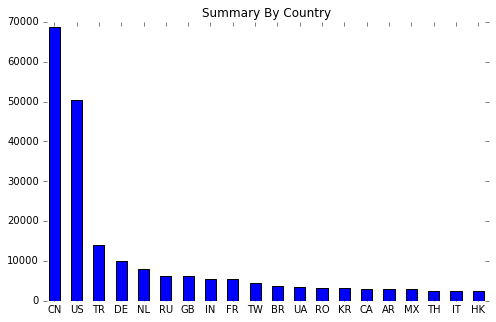

In [89]:
import matplotlib.pyplot as plt
country_ct = pd.value_counts(av['Country'])
plt.axes(frameon=0)
country_ct[:20].plot(kind='bar', rot=0, title="Summary By Country", figsize=(8,5)).grid(False)

## Listing 3-15

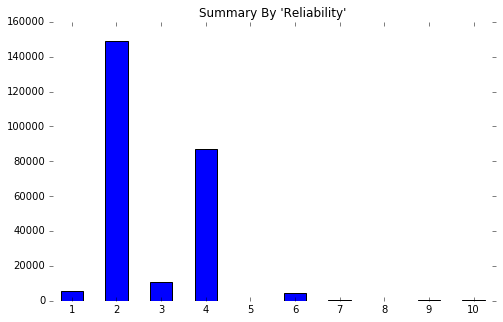

In [90]:
plt.axes(frameon=0)
factor_col(av['Reliability']).plot(kind='bar', rot=0, title="Summary By 'Reliability'", figsize=(8,5)).grid(False)

## Listed 3-16

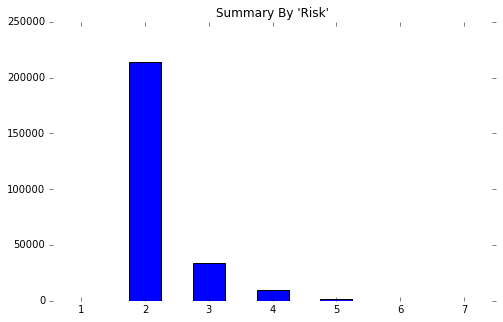

In [91]:
plt.axes(frameon=0)
factor_col(av['Risk']).plot(kind='bar', rot=0, title="Summary By 'Risk'", figsize=(8,5)).grid(False)


## Listing 3-18
The contribution of malicious nodes by countries can be reflected as a percentage output as well by dividing the value count of each country with the length of the factor.

In [92]:
top10 = pd.value_counts(av['Country'])[0:9]
top10.astype(float) / len(av['Country'])

CN    0.265179
US    0.194826
TR    0.053970
DE    0.038484
NL    0.030666
RU    0.024537
GB    0.024333
IN    0.021189
FR    0.021069
Name: Country, dtype: float64

## Listing 3-20
A numerical output of the count of nodes for each permutation of Risk~Reliability combination is made using the cm function from the pandas library.  Then, using numpy and cmap from mplotlib, you can produce a heatmap of the permutations to get a visual of where the majority of the data is concentrated.

In [93]:
from matplotlib import cm
from numpy import arange
pd.crosstab(av['Risk'], av['Reliability'])

Reliability,1,2,3,4,5,6,7,8,9,10
Risk,,,,,,,,,,
1,0,0,16,7,0,8,8,0,0,0
2,804,149114,3670,57652,4,2084,85,11,345,82
3,2225,3,6668,22168,2,2151,156,7,260,79
4,2129,0,481,6447,0,404,43,2,58,24
5,432,0,55,700,1,103,5,1,20,11
6,19,0,2,60,0,8,0,0,1,0
7,3,0,0,5,0,0,0,0,2,0


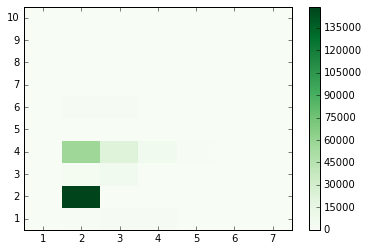

In [94]:
xtab = pd.crosstab(av['Reliability'], av['Risk'])
plt.pcolor(xtab,cmap=cm.Greens)
plt.yticks(arange(0.5, len(xtab.index), 1),xtab.index)
plt.xticks(arange(0.5, len(xtab.columns), 1),xtab.columns)
plt.colorbar()

## Listing 3-23
A three-way contingency table, relating Risk, Reliablility, and malicious node type and outputting it as a simple bargraph.

In [95]:
av['newtype'] = av['Type']
av[av['newtype'].str.contains(";")] = "Multiples"
typ = av['newtype']
rel = av['Reliability']
rsk = av['Risk']
xtab = pd.crosstab(typ, [ rel, rsk ], rownames=['typ'], colnames=['rel', 'rsk'])
print xtab.to_string()

rel                     1                               2      3                          4                                  5        6                        7                  8             9                     10            Multiples
rsk                     2     3     4    5   6  7       2  3   1     2     3    4   5  6  1      2      3     4    5   6  7  2  3  5  1    2    3    4   5  6  1   2    3   4  5  2  3  4  5    2    3   4   5  6  7   2   3   4  5 Multiples
typ                                                                                                                                                                                                                                          
C&C                     0     0     1    2   1  0       0  0   0     0     0  313  22  2  0      0      0    15   22   4  1  0  0  1  0    0    0   98  60  5  0   0    0   7  3  0  0  1  1    0    0  19  16  1  1   0   1   8  5         0
Malicious Host          0     6    51   41   8  

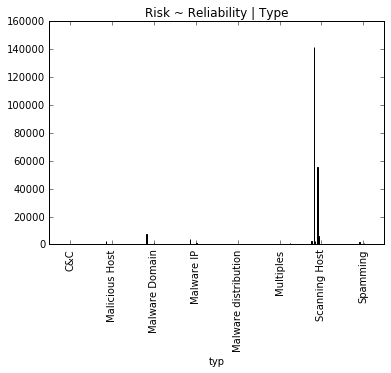

In [96]:
xtab.plot(kind='bar', legend=False, title="Risk ~ Reliability | Type").grid(False)

## Listing 3-25

The Scanning Host category is omitted since the majority of the nodes are concentrated there but have a negligable Risk~Reliability permutation.

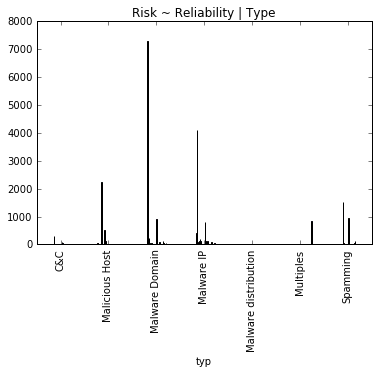

In [97]:
rrt_df = av[av['newtype'] !="Scanning Host"]
typ = rrt_df['newtype']
rel = rrt_df['Reliability']
rsk = rrt_df['Risk']
xtab = pd.crosstab(typ, [ rel, rsk ], rownames=['typ'], colnames=['rel', 'rsk'])
xtab.plot(kind='bar', legend=False, title="Risk ~ Reliability | Type").grid(False)

## Listing 3-27

The Malware distribution and Malware Domain are omitted since Malware Domain has no nodes, and Malware distribution has negligeable Risk~Reliability permutation.  A count of the nodes in the modified data shows that it accounts for 5.9% of all nodes.

In [98]:
rrt_df = rrt_df[rrt_df['newtype'] != "Malware distribution" ]
rrt_df = rrt_df[rrt_df['newtype'] != "Malware Domain" ]
typ = rrt_df['newtype']
rel = rrt_df['Reliability']
rsk = rrt_df['Risk']
xtab = pd.crosstab(typ, [ rel, rsk ], rownames=['typ'], colnames=['rel', 'rsk'])
print "Count: %d; Percent: %2.1f%%" % (len(rrt_df), (float(len(rrt_df)) / len(av))  * 100)

Count: 15171; Percent: 5.9%


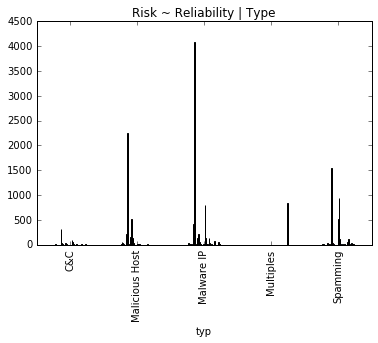

In [99]:
xtab.plot(kind='bar', legend=False, title="Risk ~ Reliability | Type").grid(False)